In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/business_dynamics.csv")

In [4]:
unique_states = df['State'].unique()
job_creation_mean = list()

In [5]:
for state in unique_states:
  # print(state, df.loc[df['State'] == state, 'Data.Job Destruction.Rate'].mean())
  m=(df.loc[df['State'] == state, 'Data.Job Creation.Rate'].mean())
  job_creation_mean.append(m)

print(job_creation_mean)

[15.720146341463415, 19.478048780487807, 19.52965853658537, 15.329512195121952, 17.822536585365853, 18.321024390243903, 14.08468292682927, 15.882243902439022, 15.171414634146341, 19.18321951219512, 17.157853658536585, 15.393560975609757, 17.35041463414634, 14.59892682926829, 14.334512195121953, 13.589682926829266, 15.036585365853655, 15.113804878048779, 16.628414634146345, 14.327512195121951, 15.934121951219515, 14.579731707317073, 14.7920243902439, 14.837731707317072, 15.130097560975608, 14.902756097560975, 16.524658536585363, 14.269658536585366, 19.29419512195122, 15.328756097560975, 15.742195121951218, 17.637121951219513, 14.931829268292685, 15.179853658536587, 14.937853658536582, 14.125121951219516, 16.66507317073171, 16.589219512195122, 13.915439024390244, 14.07231707317073, 15.51631707317073, 14.621731707317073, 15.74039024390244, 18.41887804878049, 18.290146341463412, 14.07748780487805, 15.942317073170729]


In [6]:
job_destruction_mean = list()

In [7]:
for state in unique_states:
  # print(state, df.loc[df['State'] == state, 'Data.Job Destruction.Rate'].mean())
  m=(df.loc[df['State'] == state, 'Data.Job Destruction.Rate'].mean())
  job_destruction_mean.append(m)

print(job_destruction_mean)

[14.091756097560976, 17.04039024390244, 15.822097560975607, 13.489536585365855, 15.634341463414632, 15.466341463414631, 13.197487804878048, 13.947219512195122, 13.423219512195121, 16.037195121951218, 14.663853658536585, 13.426146341463415, 14.814414634146344, 13.590390243902439, 12.994536585365855, 12.197536585365855, 13.365902439024392, 13.447999999999999, 15.189536585365852, 12.900365853658538, 13.97819512195122, 13.09339024390244, 13.728682926829268, 12.702414634146344, 13.712121951219512, 13.356731707317072, 14.517585365853655, 12.512951219512194, 15.22931707317073, 13.083341463414635, 14.401024390243906, 15.573560975609759, 13.680146341463415, 13.140951219512194, 12.681268292682928, 13.185317073170731, 14.969195121951222, 14.328682926829268, 12.808536585365855, 13.192414634146342, 13.595341463414634, 12.34070731707317, 13.841756097560975, 15.766682926829265, 14.870707317073173, 12.543024390243902, 13.692756097560974]


In [8]:
net_job_mean = list()

In [9]:
for i in range(len(job_destruction_mean)):
  net_job_mean.append(job_creation_mean[i] - job_destruction_mean[i])

In [10]:
test_list=[unique_states, net_job_mean]

In [11]:
node_list = list()

In [12]:
maxMean = max(test_list[1])

In [13]:
bias = 1.6

In [14]:
min(test_list[1])

0.8799024390243879

In [15]:
node_list = list()

for i in range(len(test_list[1])):
  # print(test_list[1][i])
  if test_list[1][i] < maxMean + bias and test_list[1][i] > maxMean - bias:
    print(test_list[0][i],test_list[1][i])
    node_list.append(test_list[0][i])

node_list

Arkansas 3.7075609756097627
Delaware 2.8546829268292715
Hawaii 3.146024390243902
Idaho 2.4939999999999998
Iowa 2.535999999999996
New Mexico 4.064878048780489
Washington 2.652195121951223
West Virginia 3.4194390243902397


['Arkansas',
 'Delaware',
 'Hawaii',
 'Idaho',
 'Iowa',
 'New Mexico',
 'Washington',
 'West Virginia']

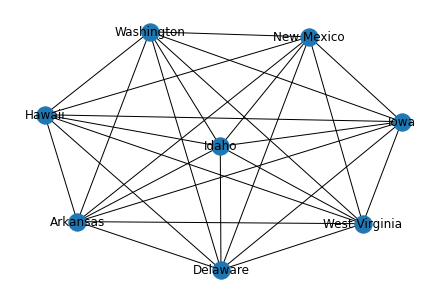

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.complete_graph(node_list)

nx.draw(G, with_labels=1)
plt.show()

In [17]:
corelation_list=list()

In [18]:
print(test_list)

[array(['Alabama', 'Alaska', 'Arkansas', 'California', 'Colorado',
       'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii',
       'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object), [1.6283902439024391, 2.437658536585367, 3.7075609756097627, 1.839975609756097, 2.188195121951221, 2.8546829268292715, 0.8871951219512226, 1.9350243902438997, 1.7481951219512197, 3.146024390243902, 2.4939999999999998, 1.9674146341463423, 2.535999999999996, 1.0085365853658512, 1.339975609756097, 1.3921463414634108, 1.6

In [22]:
from tables.tests.test_suite import test
corelation_list=list()
for i in range(30):
  for j in range(30):
    if(abs(test_list[1][i]-test_list[1][j])<=0.4):
      corelation_list.append((test_list[0][i],test_list[0][j],10))
      break;
    elif(abs(test_list[1][i]-test_list[1][j])<=1):
      corelation_list.append((test_list[0][i],test_list[0][j],5))
      break;
    elif(abs(test_list[1][i]-test_list[1][j])<=1.5):
      corelation_list.append((test_list[0][i],test_list[0][j],1))
      break;
    elif(abs(test_list[1][i]-test_list[1][j])<=3):
      corelation_list.append((test_list[0][i],test_list[0][j],0.3))



In [23]:
print((corelation_list))

[('Alabama', 'Alabama', 10), ('Alaska', 'Alabama', 5), ('Arkansas', 'Alabama', 0.3), ('Arkansas', 'Alaska', 1), ('California', 'Alabama', 10), ('Colorado', 'Alabama', 5), ('Delaware', 'Alabama', 1), ('District of Columbia', 'Alabama', 5), ('Florida', 'Alabama', 10), ('Georgia', 'Alabama', 10), ('Hawaii', 'Alabama', 0.3), ('Hawaii', 'Alaska', 5), ('Idaho', 'Alabama', 5), ('Indiana', 'Alabama', 10), ('Iowa', 'Alabama', 5), ('Kansas', 'Alabama', 5), ('Kentucky', 'Alabama', 10), ('Louisiana', 'Alabama', 10), ('Maine', 'Alabama', 10), ('Maryland', 'Alabama', 10), ('Massachusetts', 'Alabama', 10), ('Michigan', 'Alabama', 10), ('Minnesota', 'Alabama', 10), ('Mississippi', 'Alabama', 10), ('Missouri', 'Alabama', 5), ('Montana', 'Alabama', 5), ('Nebraska', 'Alabama', 10), ('Nevada', 'Alabama', 10), ('New Hampshire', 'Alabama', 10), ('New Jersey', 'Alabama', 10), ('New Mexico', 'Alabama', 0.3), ('New Mexico', 'Alaska', 0.3), ('New Mexico', 'Arkansas', 10), ('New York', 'Alabama', 5)]


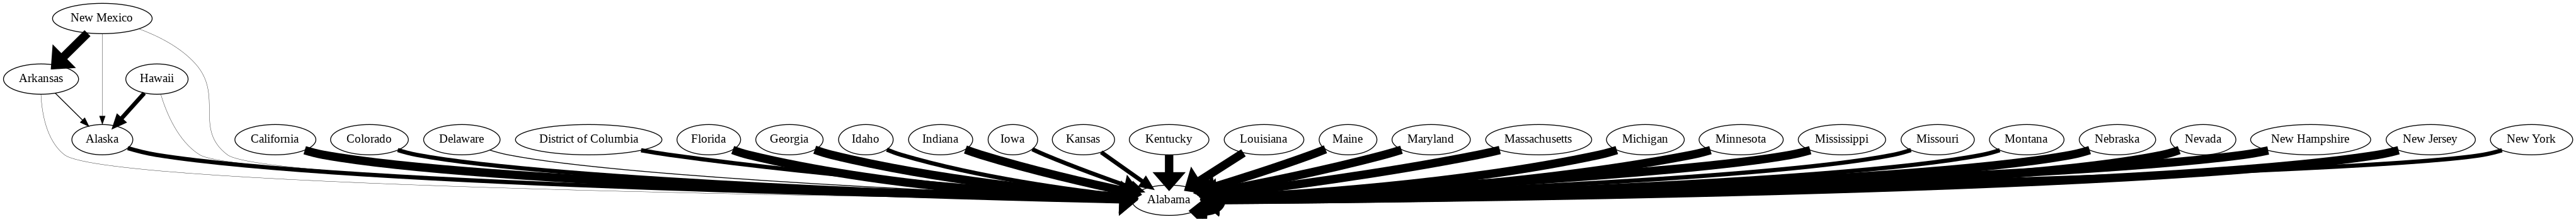

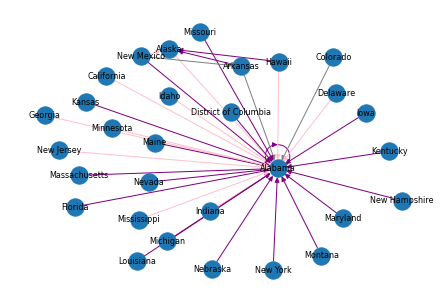

In [24]:
import networkx as nx
from IPython.display import Image
G = nx.DiGraph()
value=list()
for (u, v, w) in corelation_list:
    G.add_edge(u, v,penwidth=w)
    
    if(w==10):
      value.append('purple')
    if(w==5):
      value.append('pink')
    if(w==1):
      value.append('gray')  


    # G.add_edges_from([u,v],weight=w)
   
        # G.add_edge(u, v, penwidth=w)
    # G.add_edge(u, v, weight=w)
# nx.draw_networkx_edges(G,pos = nx.nx_pydot.graphviz_layout(G)) 


nx.nx_pydot.write_dot(G, '/content/gdrive/MyDrive/graph1.dot')  
!dot -Tpng /content/gdrive/MyDrive/graph1.dot > /content/gdrive/MyDrive/graph3.png
display(Image('/content/gdrive/MyDrive/graph3.png'))


pos = nx.spring_layout(G,scale=10)
# pos1 = nx.spiral_layout(G,scale=10)
# value=['r','g','b']
nx.draw(G,pos,font_size=8,with_labels=1,edge_color=value)
# nx.draw(G,pos1,font_size=8,with_labels=1,cmap=plt.get_cmap('jet'),node_color = 'red')
plt.show()
